imports

In [63]:
#imports
import numpy as np 
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt


In [64]:
#daset
df=pd.read_csv('../../TP_8_DataSet_Covid19_in_Germany/RKI_COVID19.csv') 
df.head()

,FID,IdBundesland,Bundesland,Landkreis,Altersgruppe,Geschlecht,AnzahlFall,AnzahlTodesfall,Meldedatum,IdLandkreis,Datenstand,NeuerFall,NeuerTodesfall,Refdatum,NeuGenesen,AnzahlGenesen,IstErkrankungsbeginn,Altersgruppe2
0,1,1,Schleswig-Holstein,SK Flensburg,A15-A34,M,1,0,2020/10/28 00:00:00,1001,"24.02.2023, 00:00 Uhr",0,-9,2020/01/19 00:00:00,0,1,1,Nicht übermittelt
1,2,1,Schleswig-Holstein,SK Flensburg,A15-A34,M,1,0,2020/03/19 00:00:00,1001,"24.02.2023, 00:00 Uhr",0,-9,2020/03/13 00:00:00,0,1,1,Nicht übermittelt
2,3,1,Schleswig-Holstein,SK Flensburg,A15-A34,M,1,0,2020/03/21 00:00:00,1001,"24.02.2023, 00:00 Uhr",0,-9,2020/03/13 00:00:00,0,1,1,Nicht übermittelt
3,4,1,Schleswig-Holstein,SK Flensburg,A35-A59,M,1,0,2020/03/14 00:00:00,1001,"24.02.2023, 00:00 Uhr",0,-9,2020/03/16 00:00:00,0,1,1,Nicht übermittelt
4,5,1,Schleswig-Holstein,SK Flensburg,A15-A34,M,1,0,2020/03/14 00:00:00,1001,"24.02.2023, 00:00 Uhr",0,-9,2020/03/16 00:00:00,0,1,1,Nicht übermittelt


rennomage

In [65]:
df.rename(columns={"IdBundesland":"ID_Etat","Bundesland":"Etat","Landkreis":"District","Altersgruppe":"Tranche_age",
"Geschlecht":"Sexe","AnzahlFall":"nbre_cas","AnzahlTodesfall":"nbre_mort","Meldedatum":"Date_notification",
"IdLandkreis":"ID_District","Datenstand":"Statut","NeuerFall":"Nouveau_cas","NeuerTodesfall":"Nouveau_mort","Refdatum":"Date_ref",
"NeuGenesen":"Nouveau_Gueri","AnzahlGenesen":"nbre_Gueri","IstErkrankungsbeginn":"Debut_maladie","Altersgruppe2":"Tranche2_age"},
inplace=True)

In [66]:
df.columns

Index(['FID', 'ID_Etat', 'Etat', 'District', 'Tranche_age', 'Sexe', 'nbre_cas',
       'nbre_mort', 'Date_notification', 'ID_District', 'Statut',
       'Nouveau_cas', 'Nouveau_mort', 'Date_ref', 'Nouveau_Gueri',
       'nbre_Gueri', 'Debut_maladie', 'Tranche2_age'],
      dtype='object')

suppresion des colonnes pas tres utiles

In [67]:
df.nunique()

FID                  6971173
ID_Etat                   16
Etat                      16
District                 411
Tranche_age                7
Sexe                       3
nbre_cas                 832
nbre_mort                 19
Date_notification       1115
ID_District              411
Statut                     1
Nouveau_cas                3
Nouveau_mort               4
Date_ref                1150
Nouveau_Gueri              4
nbre_Gueri               832
Debut_maladie              2
Tranche2_age               1
dtype: int64

In [68]:
#redondant et valeurs unique
df.drop(["Etat","FID","ID_Etat","Statut","Date_ref","Tranche2_age","ID_District"],axis=1,inplace=True)

#pas interessant
df.drop(["Nouveau_mort","Nouveau_Gueri","Nouveau_cas","Debut_maladie"],axis=1,inplace=True)


<AxesSubplot:>

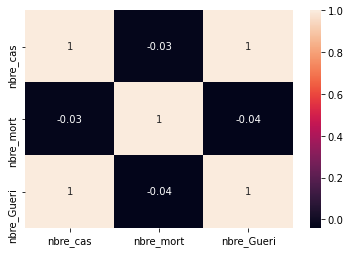

In [69]:
correlation=df.corr()
sns.heatmap(correlation,xticklabels=correlation.columns,yticklabels=correlation.columns,annot=True)


In [70]:
#nbre cas et nbre Gueri sont etroitement lié et c'est un gros probleme
df.columns

Index(['District', 'Tranche_age', 'Sexe', 'nbre_cas', 'nbre_mort',
       'Date_notification', 'nbre_Gueri'],
      dtype='object')

observont les donnees

In [71]:
df.nunique()

District              411
Tranche_age             7
Sexe                    3
nbre_cas              832
nbre_mort              19
Date_notification    1115
nbre_Gueri            832
dtype: int64

In [72]:
df.describe()

,nbre_cas,nbre_mort,nbre_Gueri
count,6.971173e+06,6.971173e+06,6.971173e+06
mean,5.463902e+00,2.405937e-02,5.401463e+00
std,1.760103e+01,1.833395e-01,1.760581e+01
min,-3.000000e+00,-1.000000e+00,-2.000000e+00
25%,1.000000e+00,0.000000e+00,1.000000e+00
50%,1.000000e+00,0.000000e+00,1.000000e+00
75%,3.000000e+00,0.000000e+00,3.000000e+00
max,2.155000e+03,2.100000e+01,2.155000e+03


In [73]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6971173 entries, 0 to 6971172
Data columns (total 7 columns):
 #   Column             Dtype 
---  ------             ----- 
 0   District           object
 1   Tranche_age        object
 2   Sexe               object
 3   nbre_cas           int64 
 4   nbre_mort          int64 
 5   Date_notification  object
 6   nbre_Gueri         int64 
dtypes: int64(3), object(4)
memory usage: 372.3+ MB


In [74]:
#correction du type date
df.Date_notification=pd.to_datetime(df.Date_notification,errors='coerce')

In [75]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6971173 entries, 0 to 6971172
Data columns (total 7 columns):
 #   Column             Dtype         
---  ------             -----         
 0   District           object        
 1   Tranche_age        object        
 2   Sexe               object        
 3   nbre_cas           int64         
 4   nbre_mort          int64         
 5   Date_notification  datetime64[ns]
 6   nbre_Gueri         int64         
dtypes: datetime64[ns](1), int64(3), object(3)
memory usage: 372.3+ MB


In [76]:
print('numerical features',df.select_dtypes(include='number').columns)
print('categorical features',df.select_dtypes(exclude='number').columns)


numerical features Index(['nbre_cas', 'nbre_mort', 'nbre_Gueri'], dtype='object')
categorical features Index(['District', 'Tranche_age', 'Sexe', 'Date_notification'], dtype='object')


In [77]:

print('Districts:\n',df.District.unique())
print('\n*******************************\n')
print('Tranche d\'age:\n',df.Tranche_age.unique())
print('\n*******************************\n')
print('Sexe:\n',df.Sexe.unique())
print('\n*******************************\n')
print('Nbre de cas:\n',df.nbre_cas.unique())
print('\n*******************************\n')
print('Nbre de mort:\n',df.nbre_mort.unique())
print('\n*******************************\n')
print('Date de notification:\n',df.Date_notification.unique())
print('\n*******************************\n')
print('Nbre Gueri:\n',df.nbre_Gueri.unique())


Districts:
 ['SK Flensburg' 'SK Kiel' 'SK Lübeck' 'SK Neumünster' 'LK Dithmarschen'
 'LK Herzogtum Lauenburg' 'LK Nordfriesland' 'LK Ostholstein'
 'LK Pinneberg' 'LK Plön' 'LK Rendsburg-Eckernförde'
 'LK Schleswig-Flensburg' 'LK Segeberg' 'LK Steinburg' 'LK Stormarn'
 'SK Hamburg' 'SK Braunschweig' 'SK Salzgitter' 'SK Wolfsburg'
 'LK Gifhorn' 'LK Goslar' 'LK Helmstedt' 'LK Northeim' 'LK Peine'
 'LK Wolfenbüttel' 'LK Göttingen' 'Region Hannover' 'LK Diepholz'
 'LK Hameln-Pyrmont' 'LK Hildesheim' 'LK Holzminden' 'LK Nienburg (Weser)'
 'LK Schaumburg' 'LK Celle' 'LK Cuxhaven' 'LK Harburg'
 'LK Lüchow-Dannenberg' 'LK Lüneburg' 'LK Osterholz'
 'LK Rotenburg (Wümme)' 'LK Heidekreis' 'LK Stade' 'LK Uelzen' 'LK Verden'
 'SK Delmenhorst' 'SK Emden' 'SK Oldenburg' 'SK Osnabrück'
 'SK Wilhelmshaven' 'LK Ammerland' 'LK Aurich' 'LK Cloppenburg'
 'LK Emsland' 'LK Friesland' 'LK Grafschaft Bentheim' 'LK Leer'
 'LK Oldenburg' 'LK Osnabrück' 'LK Vechta' 'LK Wesermarsch' 'LK Wittmund'
 'SK Bremen' 'SK B

Correction des valeurs negatives

<AxesSubplot:xlabel='Date_notification', ylabel='nbre_cas'>

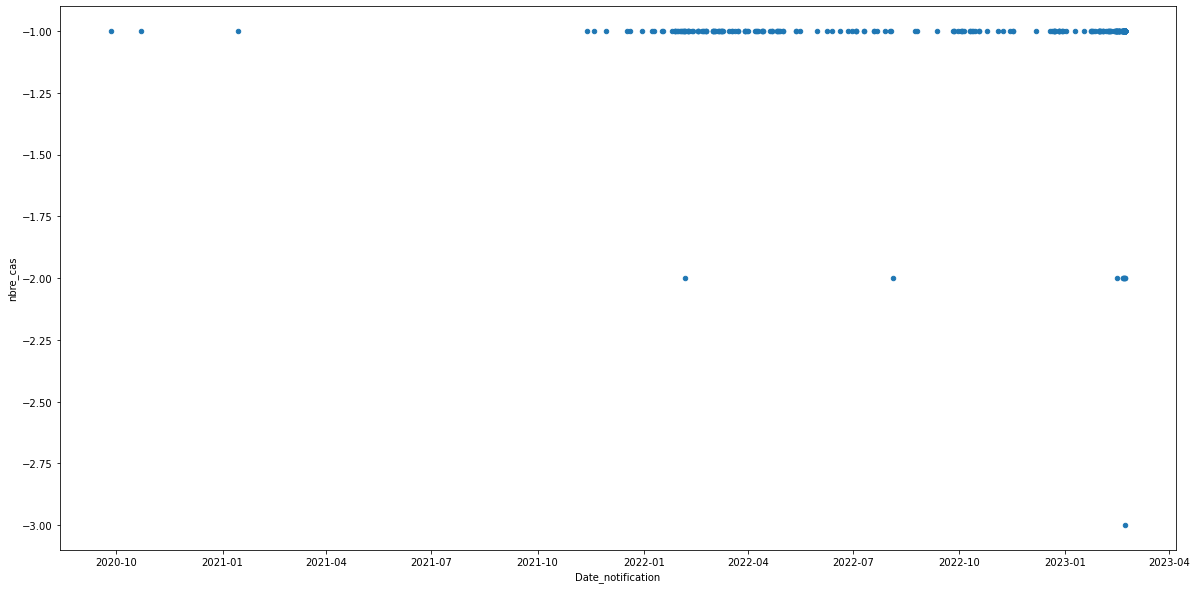

In [78]:
#cas negatif
df[df.nbre_cas<0].plot(kind="scatter",figsize=(20,10),x="Date_notification",y="nbre_cas")

<AxesSubplot:xlabel='Date_notification', ylabel='nbre_mort'>

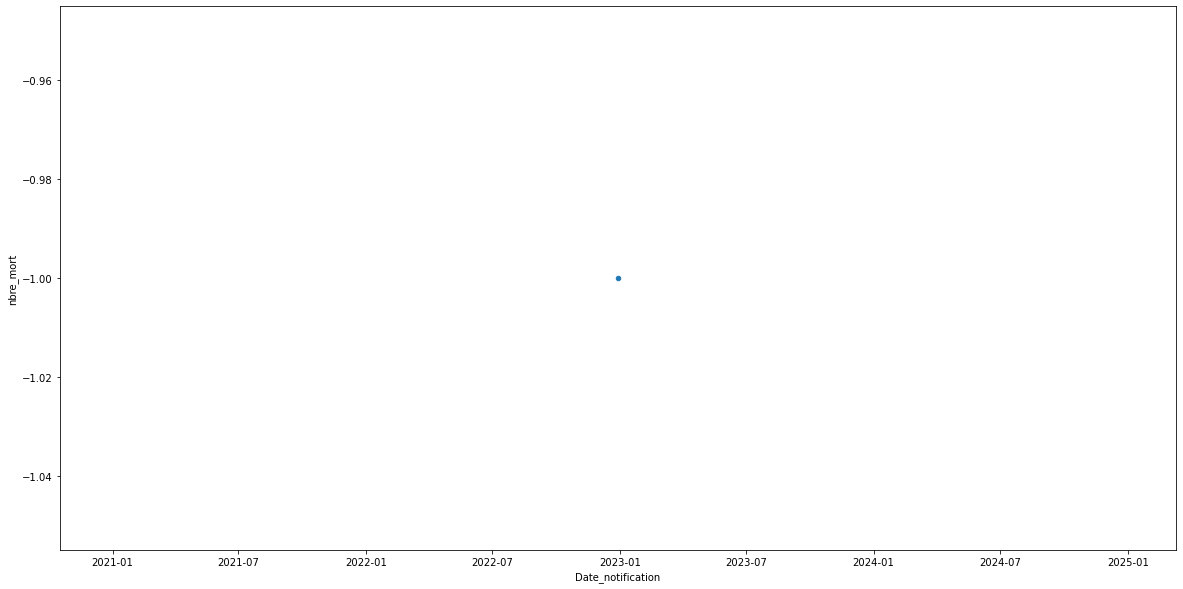

In [79]:
#mort negatif
df[df.nbre_mort<0].plot(kind="scatter",figsize=(20,10),x="Date_notification",y="nbre_mort")

In [80]:
#changeons les juste en valeurs positives
df["nbre_cas"].where(cond= df["nbre_cas"]>0, other=df["nbre_cas"]*(-1),inplace=True)
df["nbre_mort"].where(cond= df["nbre_mort"]>0, other=df["nbre_mort"]*(-1),inplace=True)
df["nbre_Gueri"].where(cond= df["nbre_Gueri"]>0, other=df["nbre_Gueri"]*(-1),inplace=True)

print(len(df[df.nbre_cas<0]))
print(len(df[df.nbre_mort<0]))
print(len(df[df.nbre_Gueri<0]))

0
0
0


Missing values

In [81]:
df.isnull().sum()

District             0
Tranche_age          0
Sexe                 0
nbre_cas             0
nbre_mort            0
Date_notification    0
nbre_Gueri           0
dtype: int64

outliers

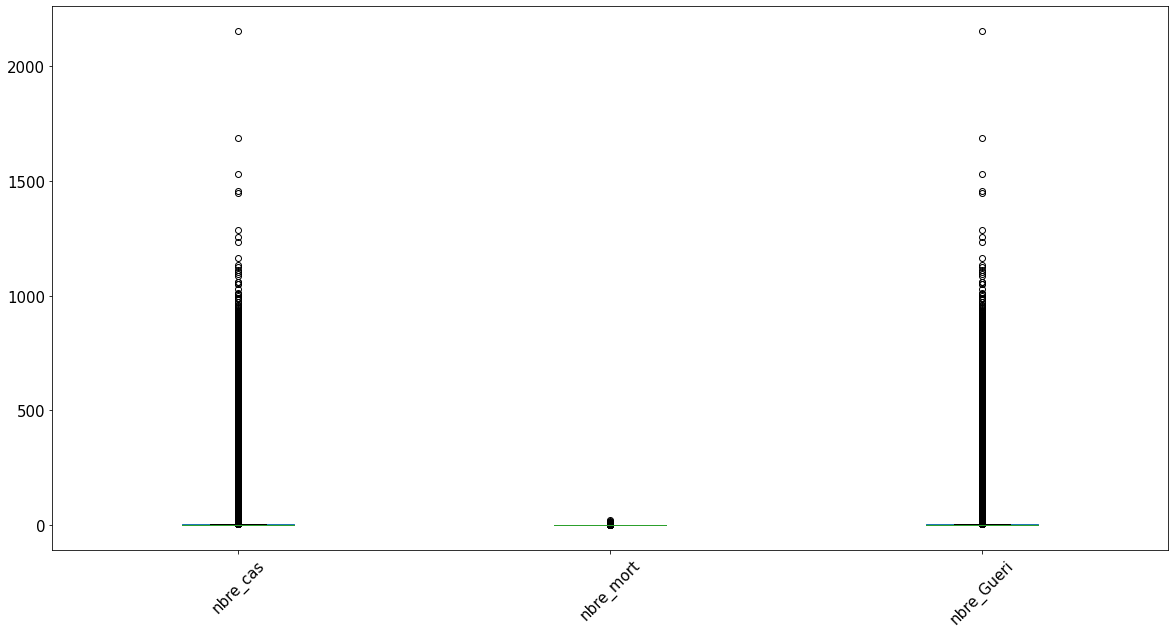

In [82]:
boxplot = df.boxplot(grid=False, rot=45, fontsize=15, column=["nbre_cas","nbre_mort","nbre_Gueri"],figsize=(20,10),)  

In [83]:
def Outliers (column):
    q1 = np.percentile(column, 25)
    q3 = np.percentile(column, 75)
    IQR=q3-q1
    outliers = column[((column<(q1-1.5*IQR)) | (column>(q3+1.5*IQR)))]
    return outliers

print('\noutliers nbre de cas')
print('--------------------')
print('\nTotal:\n',len(Outliers(df.nbre_cas)))
print('\nValeurs uniques:\n',Outliers(df.nbre_cas).unique())
print('\nValues count:\n',Outliers(df.nbre_cas).value_counts())

print('outliers nbre de mort')
print('--------------------')
print('\nTotal:\n',len(Outliers(df.nbre_mort)))
print('\nValeurs uniques:\n',Outliers(df.nbre_mort).unique())
print('\nValues count:\n',Outliers(df.nbre_mort).value_counts())




outliers nbre de cas
--------------------

Total:
 993845

Valeurs uniques:
 [  10    7    9    8   11   12   14   15   17   13   18   23   25   21
   20   19   16   35   48   62   49   34   44   37   39   52   63   43
   40   38   27   28   30   24   26   22   33   29   47   31   50   56
   75   72   46   54   51   67   60   41   83   87   98   86   45   59
   66   78   58   53   42   90   91   68   36   32   77   74   81   64
   76   82   80   55   94   73   71   99  107   69  111  103  100  166
  146  137  133   79  144   92  105  131  251  149  112  157  110   84
  123  148  250  231  293  310  164  106  108   97  125  158  119   61
   70  154  122  130  109  113  129   89   96   95  237  333  215  435
  329  325  381  346  217  160  210  172   65  104   57  102   88   85
  126  124  132  176  115  162  235  161  192  206  284  344  289  181
  140  175  156  197  117  121  168  138   93  145  101  211  150  301
  452  267  354  518  322  465  412  223  225  229  188  127  134  170

pivot

In [84]:
pivot1=pd.pivot_table(df,values=["nbre_cas","nbre_mort","nbre_Gueri"],index="Tranche_age")
pivot1.style.background_gradient(cmap="cubehelix")

,nbre_Gueri,nbre_cas,nbre_mort
Tranche_age,,,
A00-A04,2.525780,2.532427,0.000114
A05-A14,4.875532,4.882571,0.000041
A15-A34,6.242978,6.282000,0.000263
A35-A59,7.166900,7.226351,0.003996
A60-A79,4.116908,4.200346,0.041959
A80+,2.332614,2.552263,0.176872
unbekannt,2.209453,2.222816,0.000914


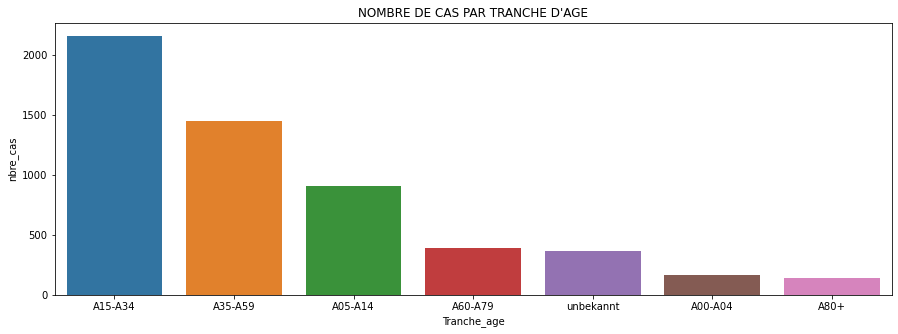

In [85]:
data_age_cas=df.groupby(by="Tranche_age").max()[["nbre_cas","Date_notification"]].sort_values(by="nbre_cas",ascending=False).reset_index()
fig=plt.figure(figsize=(15,5))
plt.title("NOMBRE DE CAS PAR TRANCHE D'AGE")
ax=sns.barplot(data=data_age_cas,x="Tranche_age",y="nbre_cas")
plt.show()

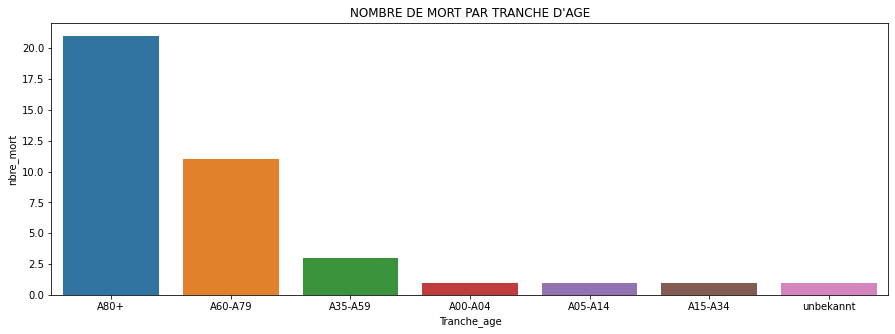

In [86]:
data_age_mort=df.groupby(by="Tranche_age").max()[["nbre_mort","Date_notification"]].sort_values(by="nbre_mort",ascending=False).reset_index()
fig=plt.figure(figsize=(15,5))
plt.title("NOMBRE DE MORT PAR TRANCHE D'AGE")
ax=sns.barplot(data=data_age_mort,x="Tranche_age",y="nbre_mort")
plt.show()

In [87]:
pivot2=pd.pivot_table(df,values=["nbre_cas","nbre_mort","nbre_Gueri"],index="Sexe",aggfunc=max)
pivot2.style.background_gradient(cmap="cubehelix")

,nbre_Gueri,nbre_cas,nbre_mort
Sexe,,,
M,1686,1686,11
W,2155,2155,21
unbekannt,1124,1124,8


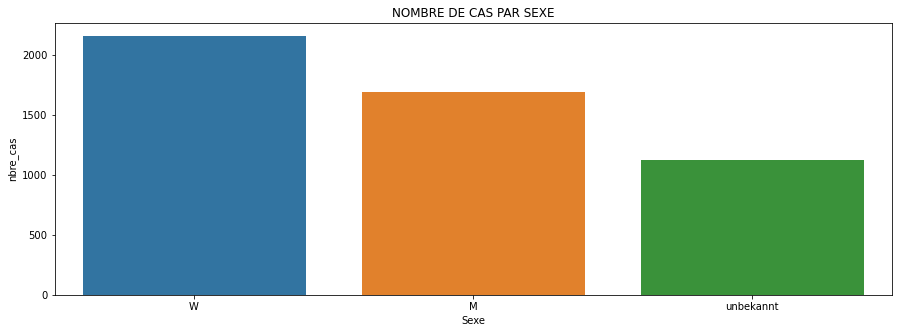

In [88]:
data_sexe_cas=df.groupby(by="Sexe").max()[["nbre_cas","Date_notification"]].sort_values(by="nbre_cas",ascending=False).reset_index()
fig=plt.figure(figsize=(15,5))
plt.title("NOMBRE DE CAS PAR SEXE")
ax=sns.barplot(data=data_sexe_cas,x="Sexe",y="nbre_cas")
plt.show()

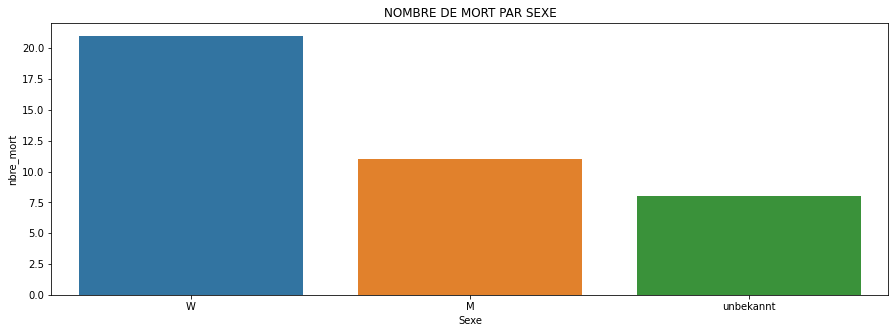

In [89]:
data_sexe_mort=df.groupby(by="Sexe").max()[["nbre_mort","Date_notification"]].sort_values(by="nbre_mort",ascending=False).reset_index()
fig=plt.figure(figsize=(15,5))
plt.title("NOMBRE DE MORT PAR SEXE")
ax=sns.barplot(data=data_sexe_mort,x="Sexe",y="nbre_mort")
plt.show()

In [90]:
pivot3=pd.pivot_table(df,values=["nbre_cas","nbre_mort","nbre_Gueri"],index="District",aggfunc=max)
pivot3.sort_values(by=["nbre_cas","nbre_mort"],ascending=False).style.background_gradient(cmap="cubehelix")

,nbre_Gueri,nbre_cas,nbre_mort
District,,,
SK Köln,2155,2155,5
SK München,1447,1447,12
LK Göttingen,1124,1124,6
SK Hamburg,1113,1113,9
Region Hannover,1052,1052,10
SK Nürnberg,694,694,21
SK Leipzig,680,680,9
SK Frankfurt am Main,613,613,7
SK Berlin Mitte,613,613,5


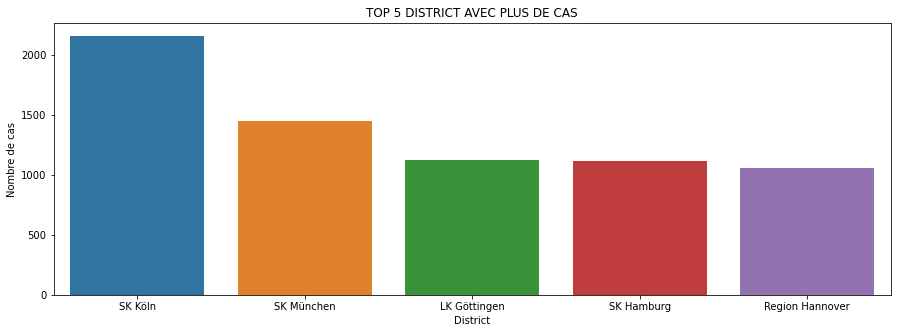

In [91]:
top_5_District_cas=df.groupby(by="District").max()[["nbre_cas","Date_notification"]].sort_values(by="nbre_cas",ascending=False).reset_index()
fig=plt.figure(figsize=(15,5))
plt.title("TOP 5 DISTRICT AVEC PLUS DE CAS")
ax=sns.barplot(data=top_5_District_cas.iloc[:5],x="District",y="nbre_cas")
plt.xlabel("District")
plt.ylabel("Nombre de cas")
plt.show()

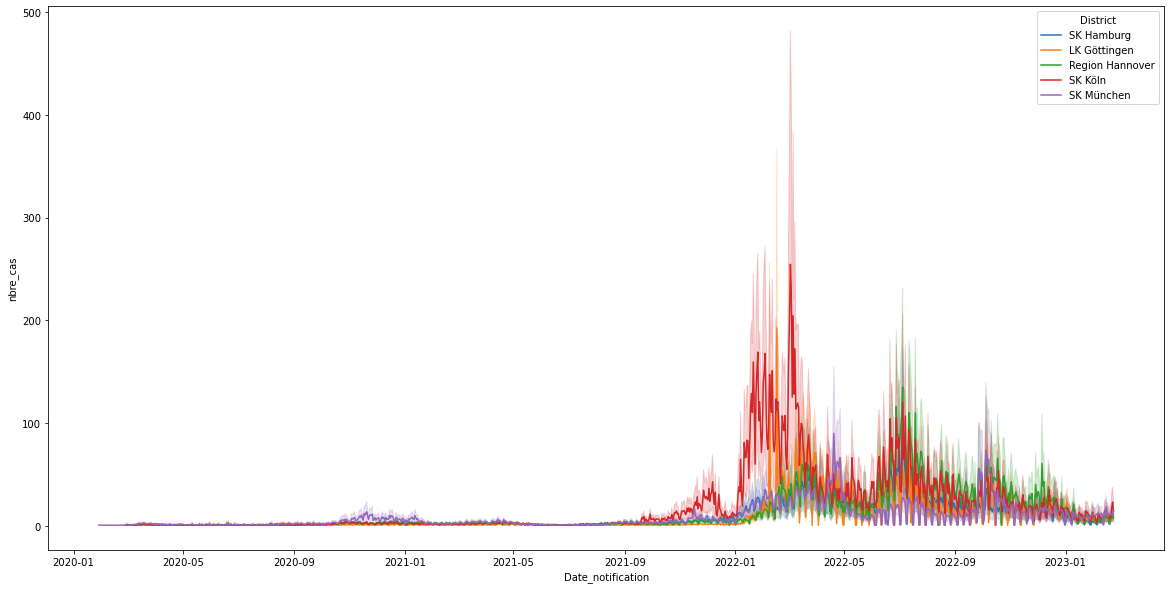

In [92]:
fig=plt.figure(figsize=(20,10))
ax=sns.lineplot(data=df[df.District.isin(["SK Köln","SK München","LK Göttingen","SK Hamburg","Region Hannover"])],x="Date_notification",y="nbre_cas",hue="District")
plt.show()